In [1]:
!pip install pretty_confusion_matrix

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sb
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 1. Création DataFrame
dataFrame = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Iris.csv")

# 2. Affichage des 10 premières lignes
dataFrame.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# 3. Affichage des dimensions
dataFrame.shape

(150, 6)

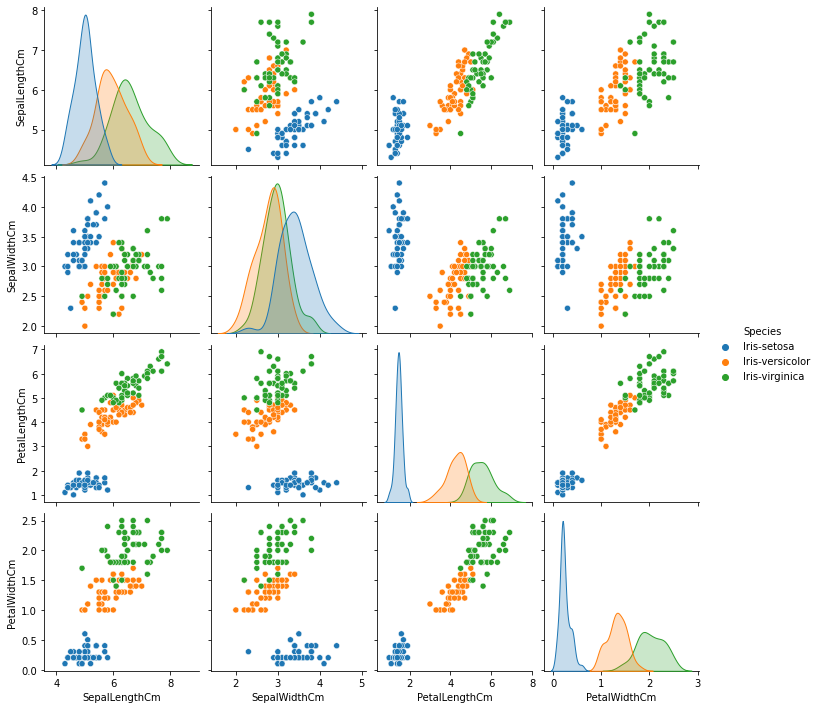

In [5]:
# 4. visualiser les données en fonction de la longueur des pétales et de largeur des sépales
sb.pairplot(data = dataFrame, vars=('SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'),hue='Species')

In [6]:
# 5. Ecrire un script python permettant de labelliser les différentes espèces d’iris
labeledDataframe = dataFrame[['Species']].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

In [7]:
# 6. Afficher du nouveau les 10 premières lignes du nouveau DataFrame contenant les labels
labeledDataframe.head(10)

,Species
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [8]:
normDataframe = dataFrame[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df =pd.concat([normDataframe, labeledDataframe], axis=1)
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [9]:
# 7. Écrire un script python permettant la division de dataset en des données d’apprentissage (70%) et des données de test (30%)
from sklearn import model_selection
train, test= model_selection.train_test_split(df, test_size=0.3)
trainX= train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
trainY= train.Species
testX=test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
testY=test.Species

In [10]:
# 8. Afficher les 10 premières données d’apprentissage
trainX.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
57,4.9,2.4,3.3,1.0
32,5.2,4.1,1.5,0.1
109,7.2,3.6,6.1,2.5
17,5.1,3.5,1.4,0.3
107,7.3,2.9,6.3,1.8
73,6.1,2.8,4.7,1.2
52,6.9,3.1,4.9,1.5
0,5.1,3.5,1.4,0.2
128,6.4,2.8,5.6,2.1
82,5.8,2.7,3.9,1.2


In [11]:
# 8. Afficher les 10 premières données de test
testX.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
118,7.7,2.6,6.9,2.3
44,5.1,3.8,1.9,0.4
47,4.6,3.2,1.4,0.2
42,4.4,3.2,1.3,0.2
96,5.7,2.9,4.2,1.3
78,6.0,2.9,4.5,1.5
56,6.3,3.3,4.7,1.6
30,4.8,3.1,1.6,0.2
7,5.0,3.4,1.5,0.2
11,4.8,3.4,1.6,0.2


In [12]:
# 9. Ecrire un script python qui utilise un perceptron multicouche pour l’apprentissage des données
%%time
mlp =MLPClassifier(solver='lbfgs', alpha =1e-05, hidden_layer_sizes=(3,3), epsilon=0.07, max_iter=150)
mlp.fit(trainX, trainY)

CPU times: user 122 ms, sys: 4.94 ms, total: 127 ms
Wall time: 324 ms


MLPClassifier(alpha=1e-05, epsilon=0.07, hidden_layer_sizes=(3, 3),
              max_iter=150, solver='lbfgs')

In [13]:
prediction= mlp.predict(testX)
print(prediction)

[2 0 0 0 1 1 1 0 0 0 1 1 2 2 0 1 2 0 2 1 0 2 0 1 0 2 1 2 2 0 2 1 2 2 1 1 2
 1 2 1 1 0 2 2 2]


In [14]:
print(testY.values)

[2 0 0 0 1 1 1 0 0 0 1 1 2 2 0 1 2 0 2 1 0 2 0 1 0 2 1 2 2 0 2 1 2 2 1 1 2
 1 2 1 1 0 2 2 1]


In [15]:
# 10. Evaluer ce perceptron en affichant son “accuracy”
print('Accuracy of the Multi Layer Perceptron is ', metrics.accuracy_score(prediction, testY))

Accuracy of the Multi Layer Perceptron is  0.9777777777777777


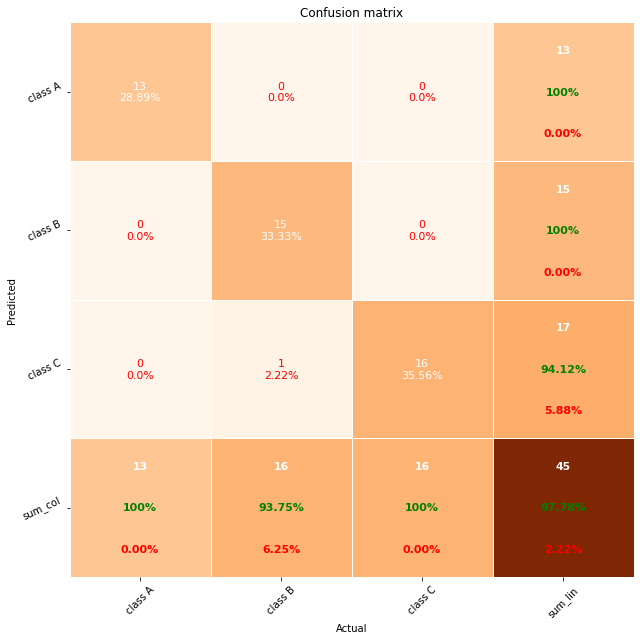

Error rate of the Multi Layer Perceptron MLP :0.022222222222222254


In [16]:
# 11. Afficher la matrice de confusion associée à notre cas
from pretty_confusion_matrix import pp_matrix_from_data
cmap='PuRd'
pp_matrix_from_data(testY.values, prediction)

print('Error rate of the Multi Layer Perceptron MLP :' + str(1-metrics.accuracy_score(testY,prediction)))

In [17]:
params= [ 
    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.2,
        "max_iter": 150,  
    },

    {
        "solver":"sgd",
        "learning_rate":"constant",
        "learning_rate_init":0.7,
        "max_iter": 300, 
    },
     {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init": 0.2,
        "max_iter": 300,
    },

     {
        "solver":"sgd",
        "learning_rate":"invscaling",
        "learning_rate_init": 0.7,
        "max_iter": 150,  
    },
    {
        "solver":"adam",
        "learning_rate_init": 0.01,
        "max_iter": 300,    
    },
]

labels=[
    "constant learning-rate_0.2",
    "constant learning-rate_0.7",
    "invscaling learning-rate_0.2",
    "invscaling learning-rate_0.7",
    "adam",
]

plot_args=[
    {"c": "red", "linestyle": "-"},
    {"c": "green", "linestyle": "-"},
    {"c": "blue", "linestyle": "-"},
    {"c": "red", "linestyle": "--"},
    {"c": "green", "linestyle": "--"},
]


In [18]:
import matplotlib.pyplot as plt
mlps = []
for label, param in zip(labels, params):
    print('training : %s' % label)
    mlp=MLPClassifier(random_state=0, **param)
    mlp.fit(trainX, trainY)
    mlps.append(mlp)
    print("training set score : %f" % mlp.score(trainX,trainY))

training : constant learning-rate_0.2
training set score : 0.352381
training : constant learning-rate_0.7
training set score : 0.352381
training : invscaling learning-rate_0.2


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


training set score : 0.990476
training : invscaling learning-rate_0.7
training set score : 0.990476
training : adam
training set score : 0.980952


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  warnings.warn(


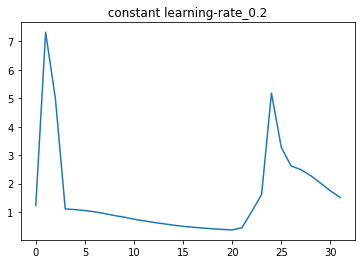

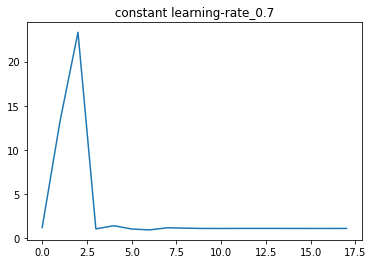

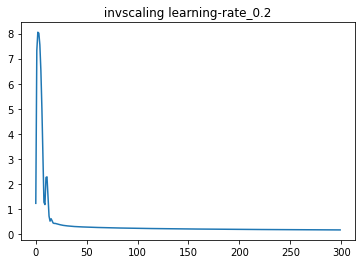

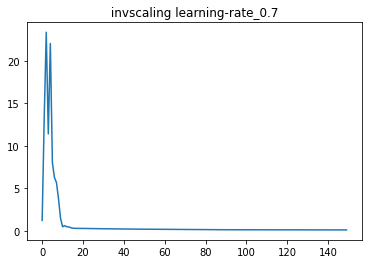

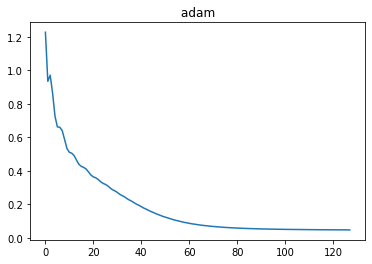

In [19]:
for mlp,label,args in zip(mlps, labels, plot_args):
    plt.plot(mlp.loss_curve_)
    plt.title(" %s " %label, fontsize=12)
    plt.show()

In [20]:
!pip install SimpSOM

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
!pip install sklearn-som

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
#kohonen
from sklearn_som.som import SOM
iris= datasets.load_iris()
iris_data= iris.data

In [23]:
iris_data.shape

(150, 4)

In [24]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import model_selection

dataFrame = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Iris.csv")
labeledDataframe = dataFrame[['Species']].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], [0,1,2])

normDataframe = dataFrame[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
df =pd.concat([normDataframe, labeledDataframe], axis=1)
df.head(10)

train, test= model_selection.train_test_split(df, test_size=0.3)
trainX= train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
trainY= train.Species
testX=test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
testY=test.Species
regr = MLPRegressor(random_state=1, max_iter=500).fit(trainX, trainY)
#Predict using the multi-layer perceptron model
prediction= regr.predict(testX)
print( prediction)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[2.03679988 1.70768399 0.76235033 1.45208177 0.69616    0.73377873
 1.60259262 1.70431061 1.9416369  0.75558402 1.44161988 0.75558402
 0.76284848 1.26017014 1.37069978 1.56989946 0.59937465 1.8396919
 0.85086211 0.70752212 0.80044719 1.87595105 1.60949027 1.82552196
 1.77557005 1.44264907 1.36261278 0.82048514 0.734815   1.20830303
 1.8874184  0.78009372 1.33477151 0.72797298 1.65896088 0.68081991
 0.73767717 0.76176481 1.72853659 1.4204797  1.83609485 1.43724813
 0.67578295 1.55592969 1.77659729]
